In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [204]:
# هنقرأ الداتا سيت
data = pd.read_csv('DOWNLOADS/gld_price_data.csv')
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [206]:
# اطبع اول 5 صفوف م الداتا سيت
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [208]:
# اطبع اخر 5 صفوف م الداتا سيت 
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [210]:
# عدد الصفوف والأعمدة
data.shape

(2290, 6)

In [212]:
# معلوماااات عن الداتا سيت 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [214]:
# القيم اللي قيمتها = null
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [216]:
#  معلوماات احصائية عن الداتا سيت
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [224]:
numeric_data = data.select_dtypes(include=['number'])

In [226]:
correlation = numeric_data.corr()

In [228]:
correlation = data.corr()

ValueError: could not convert string to float: '1/2/2008'

<Axes: >

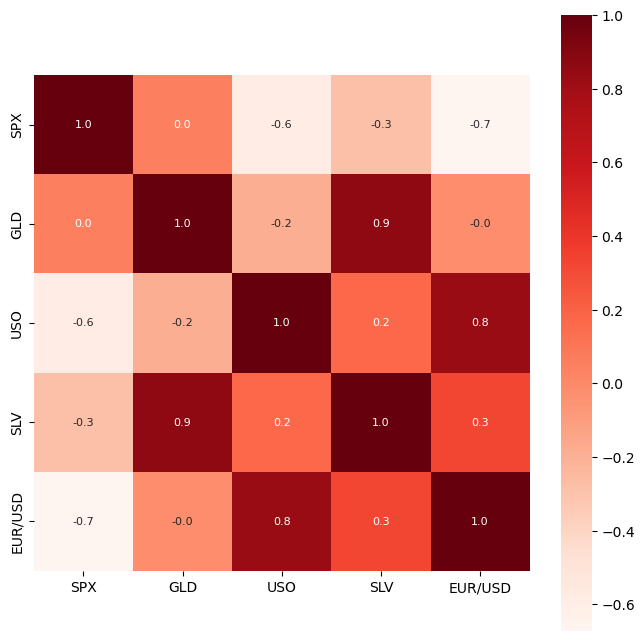

In [236]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Reds')

In [238]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\COMPUMARTS\AppData\Local\Temp\ipykernel_18284\3274464643.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='Black')


<Axes: xlabel='GLD', ylabel='Density'>

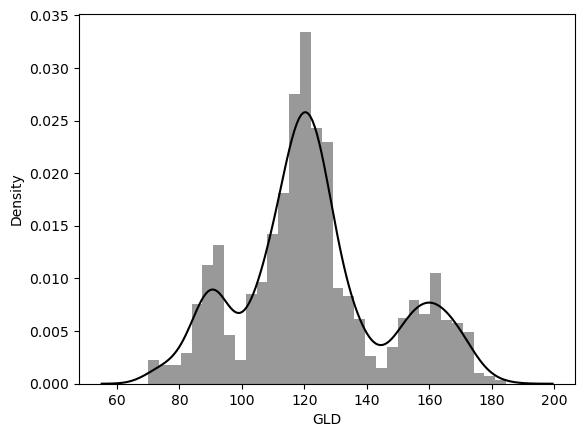

In [242]:
# checking the distribution of the GLD Price
sns.distplot(data['GLD'],color='Black')

In [244]:
X = data.drop(['Date','GLD'],axis=1)
Y = data['GLD']

In [246]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [248]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [250]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [252]:
regressor = RandomForestRegressor(n_estimators=100)

In [254]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [255]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [257]:
print(test_data_prediction)

[168.78189961  82.05829988 116.2708003  127.58160081 120.47840159
 154.47559796 150.11679916 126.17070015 117.48029874 126.02040118
 116.56560115 171.67120086 141.51979908 167.8400981  115.17139975
 117.50490035 139.65230211 169.94740058 159.41640269 158.40059881
 155.12420035 125.44029999 175.88189965 156.90170321 125.23310081
  93.6688996   77.77180016 120.40660033 119.08389959 167.4823999
  88.07109991 125.11469981  91.22920083 117.61440035 121.09249943
 136.93300132 115.31180126 115.3815007  147.93369974 107.1788012
 104.24360257  87.24539784 126.45040058 118.06509976 154.53199886
 119.47610044 108.28679998 108.11309806  93.0986005  127.13539779
  75.1656004  113.62749974 121.33250027 111.15799882 118.80119874
 120.77399966 159.96759987 166.73330165 146.98759702  85.69769848
  94.36550046  86.75269863  90.68240009 118.68630051 126.45340071
 127.47440024 170.62660014 122.28389939 117.34389907  98.70700009
 168.77520173 142.93589806 132.94080303 121.21430247 120.31759949
 119.7615005

In [260]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9890562487135538


In [262]:
Y_test = list(Y_test)

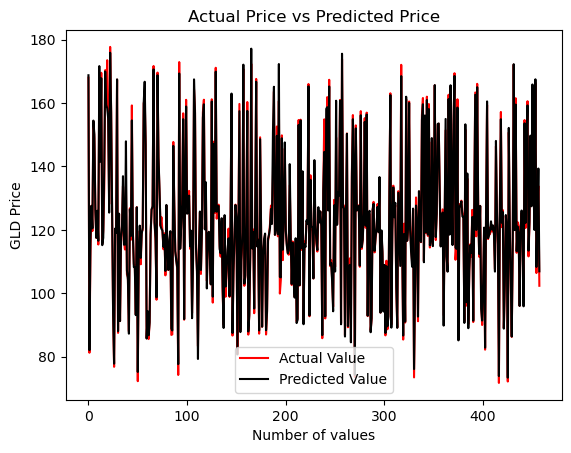

In [270]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='black', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()